In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_columns",10,"display.width",1000)
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,...,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,...,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,...,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,...,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,...,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,...,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,...,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,...,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,...,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,...,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,...,1,3101298,12.2875,NaN,S


In [5]:
train.shape

(891, 12)

In [6]:
test.shape

(418, 11)

In [7]:
train.isnull().sum() # check null values :

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test.isnull().sum() # check null values :

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train.groupby("Survived").mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [11]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [12]:
male_ind = len(train[train["Sex"] == "male"])
print("Number of males in titanic:",male_ind)

Number of males in titanic: 577


In [13]:
female_ind = len(train[train["Sex"] == "female"])
print("Number of females in titanic:",female_ind)

Number of females in titanic: 314


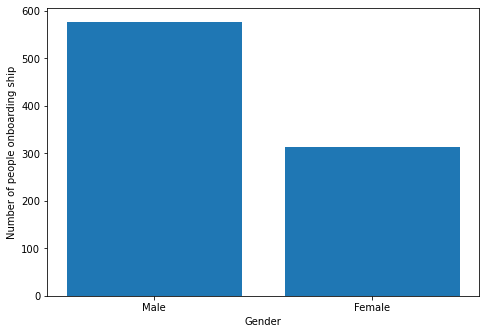

In [14]:
# plotting :
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ["Male","Female"]
index = [577,314]
ax.bar(gender,index)
plt.xlabel("Gender")
plt.ylabel("Number of people onboarding ship")
plt.show()

In [15]:
alive = len(train[train["Survived"] == 1])
dead = len(train[train["Survived"] == 0])

In [16]:
train.groupby("Sex")[["Survived"]].mean()

,Survived
Sex,
female,0.742038
male,0.188908


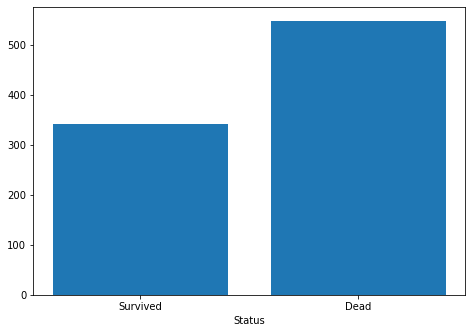

In [17]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
status = ["Survived","Dead"]
ind = [alive,dead]
ax.bar(status,ind)
plt.xlabel("Status")
plt.show()

Text(0.5, 1.0, 'Bar graph of people according to ticket class in which people couldnot survived')

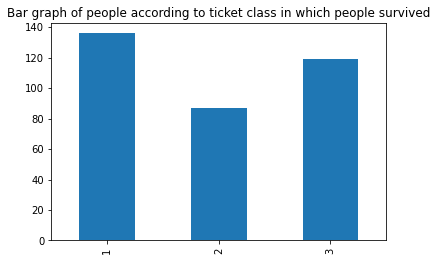

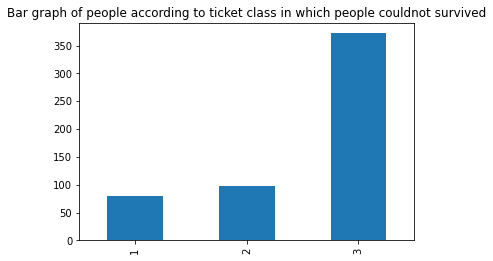

In [18]:
plt.figure(1)
train.loc[train["Survived"] == 1, "Pclass"].value_counts().sort_index().plot.bar()
plt.title("Bar graph of people according to ticket class in which people survived")


plt.figure(2)
train.loc[train["Survived"] == 0, "Pclass"].value_counts().sort_index().plot.bar()
plt.title("Bar graph of people according to ticket class in which people couldnot survived")

([<matplotlib.axis.XTick at 0x12c2674b580>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

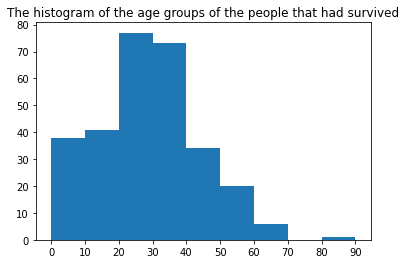

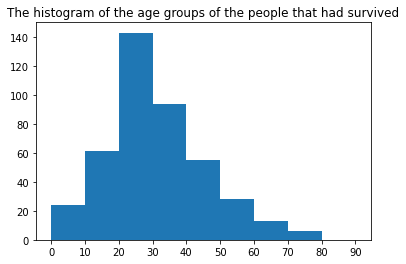

In [19]:
plt.figure(1)
age = train.loc[train.Survived == 1, "Age"]
plt.title("The histogram of the age groups of the people that had survived")
plt.hist(age, np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))


plt.figure(2)
age = train.loc[train.Survived == 0, "Age"]
plt.title("The histogram of the age groups of the people that had survived")
plt.hist(age, np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))

In [20]:
train[["SibSp","Survived"]].groupby(["SibSp"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [21]:
train[["Pclass","Survived"]].groupby(["Pclass"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [22]:
train[["Age","Survived"]].groupby(["Age"],as_index=False).mean().sort_values(by="Age",ascending=False)

,Age,Survived
87,80.00,1.0
86,74.00,0.0
85,71.00,0.0
84,70.50,0.0
83,70.00,0.0
...,...,...
4,0.92,1.0
3,0.83,1.0
2,0.75,1.0
1,0.67,1.0


In [23]:
train[["Embarked","Survived"]].groupby(["Embarked"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


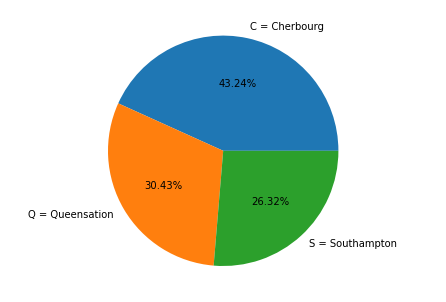

In [24]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis("equal")
l = ["C = Cherbourg", "Q = Queensation", "S = Southampton"]
s = [0.553571,0.389610,0.336957]
ax.pie(s, labels = l,autopct="%1.2f%%")
plt.show()

In [25]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [26]:
train = train.drop(["Ticket"], axis = 1) # drop unwanted columns .
test = test.drop(["Ticket"], axis = 1)

In [27]:
train = train.drop(["Cabin"], axis = 1)
test = test.drop(["Cabin"], axis = 1)

In [28]:
train = train.drop(["Name"], axis = 1)
test = test.drop(["Name"], axis = 1)

In [29]:
column_train=["Age","Pclass","SibSp","Parch","Fare","Sex","Embarked"] # feateure selection 
X=train[column_train] # training values
Y=train["Survived"]

In [30]:
X["Age"].isnull().sum()
X["Pclass"].isnull().sum()
X["SibSp"].isnull().sum()
X["Parch"].isnull().sum()
X["Fare"].isnull().sum()
X["Sex"].isnull().sum()
X["Embarked"].isnull().sum()

2

In [31]:
X["Age"]=X["Age"].fillna(X["Age"].median())
X["Age"].isnull().sum()

0

In [32]:
X["Embarked"]=train["Embarked"].fillna(method = "pad")
X["Embarked"].isnull().sum()

0

In [33]:
d={"male" :0, "female" :1}
X["Sex"]=X["Sex"].apply(lambda x:d[x])
X["Sex"].head()

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [34]:
e={"C":0, "Q":1,"S":2}
X["Embarked"]=X["Embarked"].apply(lambda x:e[x])
X["Embarked"].head()

0    2
1    0
2    2
3    2
4    2
Name: Embarked, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

In [36]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:" ,accuracy_score(Y_test,Y_pred))

Accuracy Score: 0.7574626865671642


In [37]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_mat = confusion_matrix(Y_test,Y_pred)
print(confusion_mat)

[[130  26]
 [ 39  73]]


In [38]:
from sklearn.svm import SVC
model1 = SVC()
model1.fit(X_train,Y_train)

pred_y = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Acc=",accuracy_score(Y_test,pred_y))

Acc= 0.7574626865671642


In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(Y_test,pred_y)
print(confusion_mat)
print(classification_report(Y_test,pred_y))

[[130  26]
 [ 39  73]]
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       156
           1       0.74      0.65      0.69       112

    accuracy                           0.76       268
   macro avg       0.75      0.74      0.75       268
weighted avg       0.76      0.76      0.75       268



In [40]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train,Y_train)
y_pred2 = model2.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:" ,accuracy_score(Y_test,y_pred2))

Accuracy Score: 0.6604477611940298


In [41]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(Y_test,y_pred2)
print(confusion_mat)
print(classification_report(Y_test,y_pred2))

[[127  29]
 [ 62  50]]
              precision    recall  f1-score   support

           0       0.67      0.81      0.74       156
           1       0.63      0.45      0.52       112

    accuracy                           0.66       268
   macro avg       0.65      0.63      0.63       268
weighted avg       0.66      0.66      0.65       268



In [42]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_train,Y_train)
y_pred3 = model3.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:" ,accuracy_score(Y_test,y_pred3))

Accuracy Score: 0.7686567164179104


In [43]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(Y_test,y_pred3)
print(confusion_mat)
print(classification_report(Y_test,y_pred3))

[[129  27]
 [ 35  77]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       156
           1       0.74      0.69      0.71       112

    accuracy                           0.77       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



In [44]:
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(criterion= "entropy",random_state=7)
model4.fit(X_train,Y_train)
y_pred4 = model3.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:" ,accuracy_score(Y_test,y_pred4))

Accuracy Score: 0.7686567164179104


In [45]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(Y_test,y_pred4)
print(confusion_mat)
print(classification_report(Y_test,y_pred4))

[[129  27]
 [ 35  77]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       156
           1       0.74      0.69      0.71       112

    accuracy                           0.77       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



In [46]:
results = pd.DataFrame({
    "Model" : ["Logistics Regression","Support Vector Machines","Naive Bayes","KNN","Decision Tree"],
    "Score" : [0.75,0.66,0.76,0.66,0.74]})

result_df = results.sort_values(by="Score", ascending=False)
result_df = result_df.set_index("Score")
result_df.head(9)

,Model
Score,
0.76,Naive Bayes
0.75,Logistics Regression
0.74,Decision Tree
0.66,Support Vector Machines
0.66,KNN
